In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn import preprocessing, feature_extraction, model_selection, feature_selection,ensemble,utils

In [2]:
os.getcwd()

'C:\\C2FO_assign'

In [3]:
df1=pd.read_csv(os.path.join(os.getcwd(),'yellow_tripdata_2017-01.csv'))
df1.shape

(9710124, 17)

In [4]:
df1.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2017-01-09 11:13:28,2017-01-09 11:25:45,1,3.30,1,N,263,161,1,12.5,0.0,0.5,2.00,0.0,0.3,15.30
1,1,2017-01-09 11:32:27,2017-01-09 11:36:01,1,0.90,1,N,186,234,1,5.0,0.0,0.5,1.45,0.0,0.3,7.25
2,1,2017-01-09 11:38:20,2017-01-09 11:42:05,1,1.10,1,N,164,161,1,5.5,0.0,0.5,1.00,0.0,0.3,7.30
3,1,2017-01-09 11:52:13,2017-01-09 11:57:36,1,1.10,1,N,236,75,1,6.0,0.0,0.5,1.70,0.0,0.3,8.50
4,2,2017-01-01 00:00:00,2017-01-01 00:00:00,1,0.02,2,N,249,234,2,52.0,0.0,0.5,0.00,0.0,0.3,52.80
5,1,2017-01-01 00:00:02,2017-01-01 00:03:50,1,0.50,1,N,48,48,2,4.0,0.5,0.5,0.00,0.0,0.3,5.30
6,2,2017-01-01 00:00:02,2017-01-01 00:39:22,4,7.75,1,N,186,36,1,22.0,0.5,0.5,4.66,0.0,0.3,27.96
7,1,2017-01-01 00:00:03,2017-01-01 00:06:58,1,0.80,1,N,162,161,1,6.0,0.5,0.5,1.45,0.0,0.3,8.75
8,1,2017-01-01 00:00:05,2017-01-01 00:08:33,2,0.90,1,N,48,50,1,7.0,0.5,0.5,0.00,0.0,0.3,8.30
9,2,2017-01-01 00:00:05,2017-01-01 00:05:04,5,1.76,1,N,140,74,2,7.0,0.5,0.5,0.00,0.0,0.3,8.30


## Data preprocessing

In [5]:
#Linear combination of miscallaneous charges along with fare amount and tolls woll yield us total amount. 

In [6]:
df2=df1.drop(columns=['extra','mta_tax','improvement_surcharge','tolls_amount','fare_amount'])

In [7]:
df2.head(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,tip_amount,total_amount
0,1,2017-01-09 11:13:28,2017-01-09 11:25:45,1,3.30,1,N,263,161,1,2.00,15.30
1,1,2017-01-09 11:32:27,2017-01-09 11:36:01,1,0.90,1,N,186,234,1,1.45,7.25
2,1,2017-01-09 11:38:20,2017-01-09 11:42:05,1,1.10,1,N,164,161,1,1.00,7.30
3,1,2017-01-09 11:52:13,2017-01-09 11:57:36,1,1.10,1,N,236,75,1,1.70,8.50
4,2,2017-01-01 00:00:00,2017-01-01 00:00:00,1,0.02,2,N,249,234,2,0.00,52.80
5,1,2017-01-01 00:00:02,2017-01-01 00:03:50,1,0.50,1,N,48,48,2,0.00,5.30
6,2,2017-01-01 00:00:02,2017-01-01 00:39:22,4,7.75,1,N,186,36,1,4.66,27.96
7,1,2017-01-01 00:00:03,2017-01-01 00:06:58,1,0.80,1,N,162,161,1,1.45,8.75
8,1,2017-01-01 00:00:05,2017-01-01 00:08:33,2,0.90,1,N,48,50,1,0.00,8.30
9,2,2017-01-01 00:00:05,2017-01-01 00:05:04,5,1.76,1,N,140,74,2,0.00,8.30


In [8]:
num_examples=df2.shape[0]
print(num_examples)

9710124


In [9]:
# check for any missing values
df2.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
tip_amount               0
total_amount             0
dtype: int64

In [10]:
import seaborn as sns

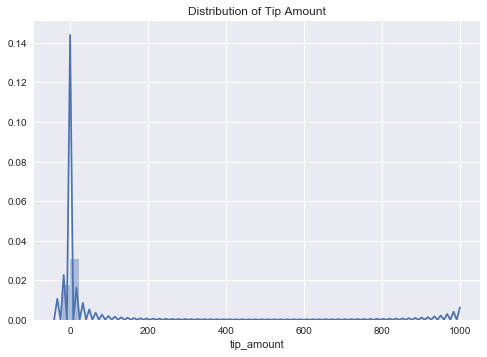

In [11]:
sns.distplot(df2['tip_amount'],vertical=False)
plt.title('Distribution of Tip Amount')
plt.figure(figsize=(8,8))
plt.show()

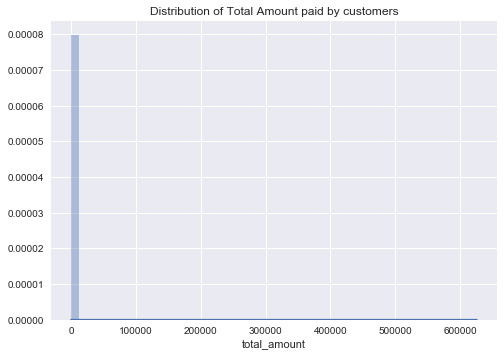

In [12]:
sns.distplot(df2['total_amount'],vertical=False)
plt.title('Distribution of Total Amount paid by customers')
plt.figure(figsize=(8,8))
plt.show()

C:\Users\bharg\Anaconda3\lib\site-packages\seaborn\categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


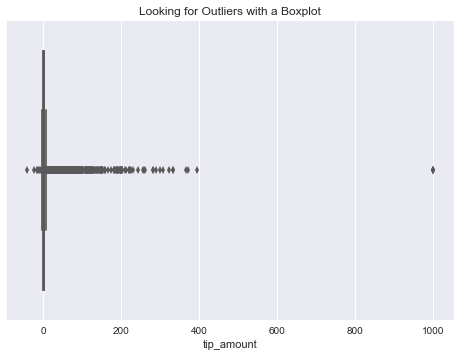

In [13]:
sns.boxplot(df2['tip_amount'], palette="Set2" )

plt.title('Looking for Outliers with a Boxplot')
plt.show()

In [14]:
# Drop rows where trip distance=0 and Ratecode ID where ID not between [1,6]
df2.loc[((df2['payment_type'] == 3) & (df2['tip_amount'] !=0.0)) | (df2['RatecodeID']>6)].count()

VendorID                 251
tpep_pickup_datetime     251
tpep_dropoff_datetime    251
passenger_count          251
trip_distance            251
RatecodeID               251
store_and_fwd_flag       251
PULocationID             251
DOLocationID             251
payment_type             251
tip_amount               251
total_amount             251
dtype: int64

In [15]:
print(df2['total_amount'].min()," ",df2['total_amount'].max())

-350.3   625901.6


In [16]:
df2.loc[df2['total_amount']==df2['total_amount'].max()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,tip_amount,total_amount
1780817,1,2017-01-19 09:29:44,2017-01-19 09:29:44,3,0.0,1,N,239,264,2,0.0,625901.6


In [17]:
df2.loc[df2['total_amount']==df2['total_amount'].min()]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,tip_amount,total_amount
7596027,2,2017-01-26 01:08:40,2017-01-26 01:11:20,1,0.19,5,N,75,75,3,0.0,-350.3


In [18]:
df2 = df2[(df2['total_amount'] >= 2.5)]
df2=df2[(df2['trip_distance']>0.0)]
df2=df2[(df2['tip_amount']>=0.0)]
df2=df2[(df2['RatecodeID']<=6)]

In [19]:
df2.shape

(9646285, 12)

In [20]:
df2.loc[(df2['passenger_count']==0)].count()

VendorID                 38
tpep_pickup_datetime     38
tpep_dropoff_datetime    38
passenger_count          38
trip_distance            38
RatecodeID               38
store_and_fwd_flag       38
PULocationID             38
DOLocationID             38
payment_type             38
tip_amount               38
total_amount             38
dtype: int64

In [21]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9646285 entries, 0 to 9710123
Data columns (total 12 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
RatecodeID               int64
store_and_fwd_flag       object
PULocationID             int64
DOLocationID             int64
payment_type             int64
tip_amount               float64
total_amount             float64
dtypes: float64(3), int64(6), object(3)
memory usage: 956.7+ MB


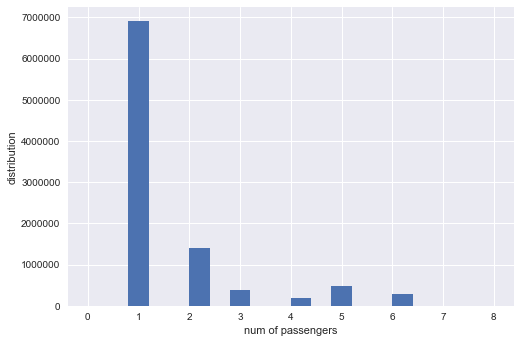

In [22]:
plt.hist(df2['passenger_count'], 20,range=(0,8))
plt.xlabel('num of passengers')
plt.ylabel('distribution')
plt.show()

In [23]:
df2=df2[(df2['passenger_count']>0) & (df2['passenger_count']<7)]

In [24]:
df2.shape

(9646224, 12)

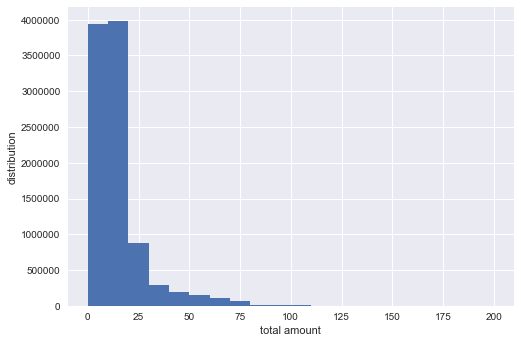

In [25]:
plt.hist(df2['total_amount'],20,range=(0,200))

plt.xlabel('total amount')
plt.ylabel('distribution')
#plt.axis([0, 2000, 0, df2.shape[0]])
plt.show()

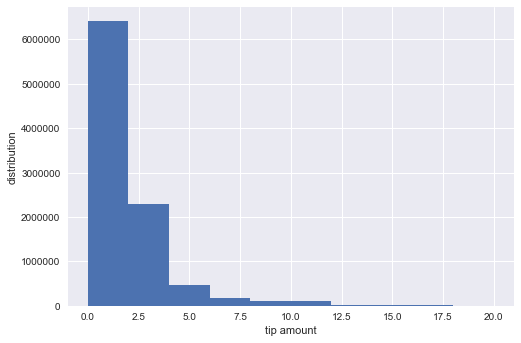

In [26]:
plt.hist(df2['tip_amount'],10,range=(0,20))

plt.xlabel('tip amount')
plt.ylabel('distribution')
plt.show()

In [27]:
t2=pd.to_datetime(df2['tpep_pickup_datetime'])
t1=pd.to_datetime(df2['tpep_dropoff_datetime'])

In [28]:
dur_mins=(t1-t2).astype('timedelta64[s]')/60.0

In [29]:
df2=df2.assign(dur_mins=dur_mins.values)

In [30]:
df2.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,tip_amount,total_amount,dur_mins
0,1,2017-01-09 11:13:28,2017-01-09 11:25:45,1,3.30,1,N,263,161,1,2.00,15.30,12.283333
1,1,2017-01-09 11:32:27,2017-01-09 11:36:01,1,0.90,1,N,186,234,1,1.45,7.25,3.566667
2,1,2017-01-09 11:38:20,2017-01-09 11:42:05,1,1.10,1,N,164,161,1,1.00,7.30,3.750000
3,1,2017-01-09 11:52:13,2017-01-09 11:57:36,1,1.10,1,N,236,75,1,1.70,8.50,5.383333
4,2,2017-01-01 00:00:00,2017-01-01 00:00:00,1,0.02,2,N,249,234,2,0.00,52.80,0.000000


In [31]:
df2=df2.drop(columns=['tpep_pickup_datetime','tpep_dropoff_datetime'])

In [32]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9646224 entries, 0 to 9710123
Data columns (total 11 columns):
VendorID              int64
passenger_count       int64
trip_distance         float64
RatecodeID            int64
store_and_fwd_flag    object
PULocationID          int64
DOLocationID          int64
payment_type          int64
tip_amount            float64
total_amount          float64
dur_mins              float64
dtypes: float64(4), int64(6), object(1)
memory usage: 883.1+ MB


In [33]:
#Calc label y i.e., %tip by customer from total_amount and tip_amount 
percent_tip=(df2['tip_amount'].values/df2['total_amount'].values)*100.0
percent_tip[np.isnan(percent_tip)]=0

In [34]:
percent_tip

array([ 13.07189542,  20.        ,  13.69863014, ...,  16.63479924,
        11.80916391,  11.36363636])

In [35]:
df2=df2.drop(columns='tip_amount')

In [36]:
df2.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,total_amount,dur_mins
0,1,1,3.30,1,N,263,161,1,15.30,12.283333
1,1,1,0.90,1,N,186,234,1,7.25,3.566667
2,1,1,1.10,1,N,164,161,1,7.30,3.750000
3,1,1,1.10,1,N,236,75,1,8.50,5.383333
4,2,1,0.02,2,N,249,234,2,52.80,0.000000


In [37]:
df2=df2.assign(percent_tips=percent_tip.astype(np.float32))

In [38]:
df2.head()

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,total_amount,dur_mins,percent_tips
0,1,1,3.30,1,N,263,161,1,15.30,12.283333,13.071896
1,1,1,0.90,1,N,186,234,1,7.25,3.566667,20.000000
2,1,1,1.10,1,N,164,161,1,7.30,3.750000,13.698630
3,1,1,1.10,1,N,236,75,1,8.50,5.383333,20.000000
4,2,1,0.02,2,N,249,234,2,52.80,0.000000,0.000000


In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9646224 entries, 0 to 9710123
Data columns (total 11 columns):
VendorID              int64
passenger_count       int64
trip_distance         float64
RatecodeID            int64
store_and_fwd_flag    object
PULocationID          int64
DOLocationID          int64
payment_type          int64
total_amount          float64
dur_mins              float64
percent_tips          float32
dtypes: float32(1), float64(3), int64(6), object(1)
memory usage: 846.3+ MB


In [40]:
# Record which day according to when the passenger was picked up
dow2=t2.dt.dayofweek
df2['day_of_week']=dow2

In [41]:
df2.head(10)

,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,total_amount,dur_mins,percent_tips,day_of_week
0,1,1,3.30,1,N,263,161,1,15.30,12.283333,13.071896,0
1,1,1,0.90,1,N,186,234,1,7.25,3.566667,20.000000,0
2,1,1,1.10,1,N,164,161,1,7.30,3.750000,13.698630,0
3,1,1,1.10,1,N,236,75,1,8.50,5.383333,20.000000,0
4,2,1,0.02,2,N,249,234,2,52.80,0.000000,0.000000,6
5,1,1,0.50,1,N,48,48,2,5.30,3.800000,0.000000,6
6,2,4,7.75,1,N,186,36,1,27.96,39.333333,16.666666,6
7,1,1,0.80,1,N,162,161,1,8.75,6.916667,16.571428,6
8,1,2,0.90,1,N,48,50,1,8.30,8.466667,0.000000,6
9,2,5,1.76,1,N,140,74,2,8.30,4.983333,0.000000,6


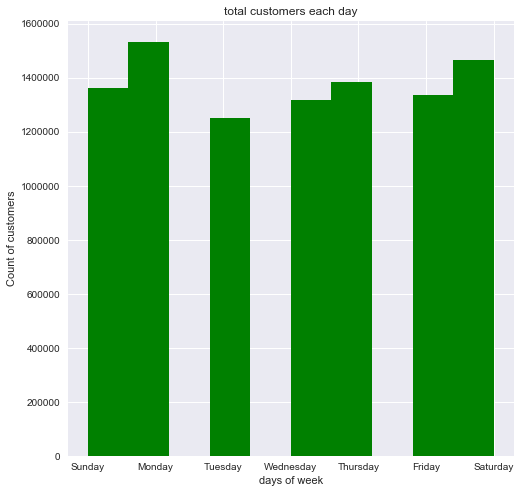

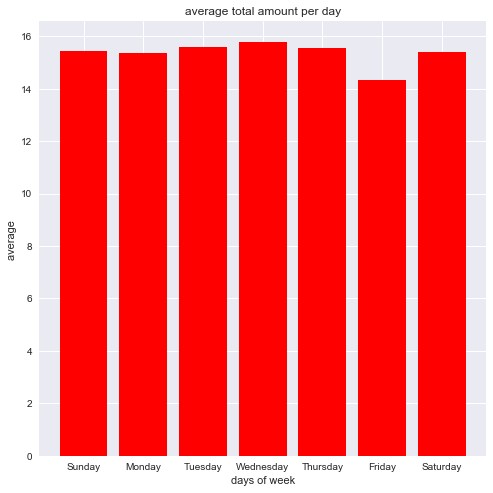

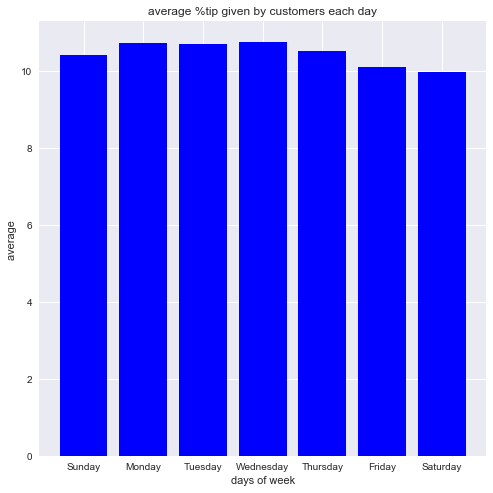

In [42]:
def plot_perday(dataframe,figsize,days):
    plt.figure(figsize=figsize)
    plt.hist(dataframe['day_of_week'],10,range=(0,6),color='g')
    plt.xlabel('days of week')
    plt.ylabel('Count of customers')
    plt.title('total customers each day')
    plt.xticks(list(set(dataframe['day_of_week'].values)),days)
    
    days_grouped=dataframe.groupby(['day_of_week']).mean()
    plt.figure(figsize=figsize)
    plt.bar(days_grouped.index,days_grouped.total_amount,color='r')
    plt.ylabel('average ')
    plt.xlabel('days of week')
    plt.title('average total amount per day')
    plt.xticks(list(set(dataframe['day_of_week'].values)),
               days)

    plt.figure(figsize=figsize)
    plt.bar(days_grouped.index,days_grouped.percent_tips,color='b')
    plt.ylabel('average ')
    plt.xlabel('days of week')
    plt.title('average %tip given by customers each day')
    plt.xticks(list(set(dataframe['day_of_week'].values)),
               days)
    plt.show()

plot_perday(df2,(8,8),('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'))

In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9646224 entries, 0 to 9710123
Data columns (total 12 columns):
VendorID              int64
passenger_count       int64
trip_distance         float64
RatecodeID            int64
store_and_fwd_flag    object
PULocationID          int64
DOLocationID          int64
payment_type          int64
total_amount          float64
dur_mins              float64
percent_tips          float32
day_of_week           int64
dtypes: float32(1), float64(3), int64(7), object(1)
memory usage: 919.9+ MB


In [44]:
df2[(df2['trip_distance']<=0.05)].count()

VendorID              8439
passenger_count       8439
trip_distance         8439
RatecodeID            8439
store_and_fwd_flag    8439
PULocationID          8439
DOLocationID          8439
payment_type          8439
total_amount          8439
dur_mins              8439
percent_tips          8439
day_of_week           8439
dtype: int64

In [45]:
#The initial charge is $2.50.
#Plus 50 cents per 1/5 mile or 50 cents per 60 seconds in slow traffic or when the vehicle is stopped.

df2=df2[~((df2['trip_distance']<=0.05) & (df2['total_amount']>40))]

In [46]:
# Drop store_and_fwd_flag since it doesn't add info to predicting tip amount 
# This flag indicates whether the trip record was held in vehicle  
# memory before sending to the vendor, aka “store and forward,” 
# because the vehicle did not have a connection to the server.
df2=df2.drop(columns='store_and_fwd_flag')

In [47]:
#outliers- travelling at super-high speeds of 300mph or more
df2=df2[~((df2['dur_mins']<1) & (df2['trip_distance']>5))]

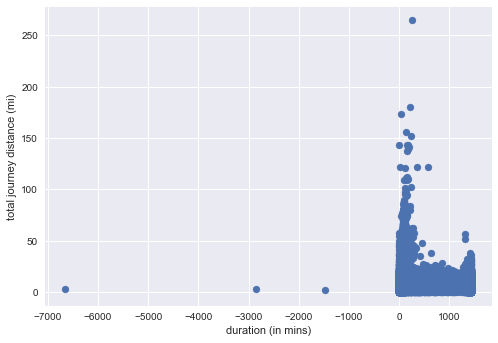

In [48]:
plt.scatter(df2['dur_mins'],df2['trip_distance'],cmap='b')
plt.xlabel('duration (in mins)')
plt.ylabel('total journey distance (mi)')
plt.show()

In [49]:
# remove the outliers detected
df2=df2[df2['dur_mins']>0]

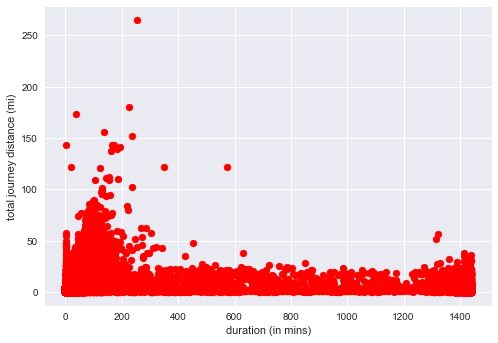

In [50]:
plt.scatter(df2['dur_mins'],df2['trip_distance'],color='r')
plt.xlabel('duration (in mins)')
plt.ylabel('total journey distance (mi)')
plt.show()

In [51]:
df2=df2[['VendorID','passenger_count',
         'trip_distance','RatecodeID',
         'PULocationID','DOLocationID',
         'payment_type','total_amount',
         'dur_mins','day_of_week','percent_tips']]
df2.head(10)

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount,dur_mins,day_of_week,percent_tips
0,1,1,3.30,1,263,161,1,15.30,12.283333,0,13.071896
1,1,1,0.90,1,186,234,1,7.25,3.566667,0,20.000000
2,1,1,1.10,1,164,161,1,7.30,3.750000,0,13.698630
3,1,1,1.10,1,236,75,1,8.50,5.383333,0,20.000000
5,1,1,0.50,1,48,48,2,5.30,3.800000,6,0.000000
6,2,4,7.75,1,186,36,1,27.96,39.333333,6,16.666666
7,1,1,0.80,1,162,161,1,8.75,6.916667,6,16.571428
8,1,2,0.90,1,48,50,1,8.30,8.466667,6,0.000000
9,2,5,1.76,1,140,74,2,8.30,4.983333,6,0.000000
10,2,1,8.47,1,138,262,1,38.55,15.516667,6,20.000000


In [52]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9642357 entries, 0 to 9710123
Data columns (total 11 columns):
VendorID           int64
passenger_count    int64
trip_distance      float64
RatecodeID         int64
PULocationID       int64
DOLocationID       int64
payment_type       int64
total_amount       float64
dur_mins           float64
day_of_week        int64
percent_tips       float32
dtypes: float32(1), float64(3), int64(7)
memory usage: 1.1 GB


## Machine Learning

In [53]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

random_seed=42

data_X=df2[['VendorID','passenger_count',
         'trip_distance','RatecodeID',
         'PULocationID','DOLocationID',
         'payment_type','total_amount',
         'dur_mins','day_of_week']]
data_Y=df2['percent_tips']

Xtrain,Xtest,ytrain,ytest=train_test_split(data_X, data_Y, random_state=random_seed,test_size=0.3)

In [54]:
print("input train shape: ",Xtrain.shape,"\n","target train shape: ",ytrain.shape,"\n","Input test shape: ",Xtest.shape)

input train shape:  (6749649, 10) 
 target train shape:  (6749649,) 
 Input test shape:  (2892708, 10)


Linear Regression

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,confusion_matrix

def l_reg(Xtrain,ytrain,Xtest):
    lr=LinearRegression(normalize=True)
    '''
    kf = KFold(n_splits=4)
    min_R_score=9999999
    for train_index,val_index in kf.split(X):
        Xt1,yt1=Xtrain[train_index],ytrain[train_index]
        Xv1,yv1=Xtrain[val_index],ytest[val_index]
        #lr.fit(Xt1,yt1)
        lr.fit(Xv1,yv1)
        score=lr.score(Xv1, yv1, sample_weight=None)
        if score<min_R_score:
            min_R_score=score
            use_indices=train_index
    actual_Xtrain,actual_ytrain=Xtrain[use_indices],ytrain[use_indices]
    lr.fit(actual_Xtrain,actual_ytrain)
    '''
    lr.fit(Xtrain,ytrain)
    score=lr.score(Xtrain,ytrain)
    print("training error: ",score)
    ypred=lr.predict(Xtest)
    return ypred

lr_predictions=l_reg(Xtrain,ytrain,Xtest)

training error:  0.730572433369


In [56]:
def plot_res(yhat,y):
    plt.scatter(y,yhat,color='g')
    plt.xlabel('Labels')
    plt.ylabel('predicted')
    plt.title('Test: Predicted vs Target')
    plt.show()
    
    plt.scatter(yhat,yhat-y,color='b')
    plt.xlabel('Predicted')
    plt.ylabel('Residual error')
    plt.title('Test: Residual Plot')
    plt.show()

number of instances where negative values were predicted:  65172


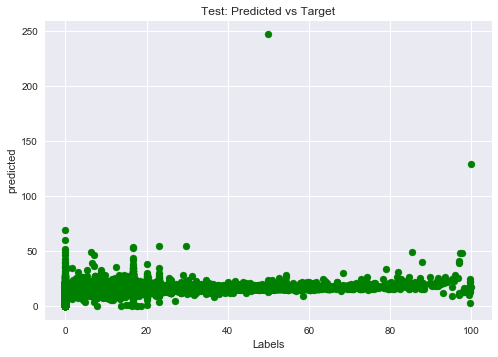

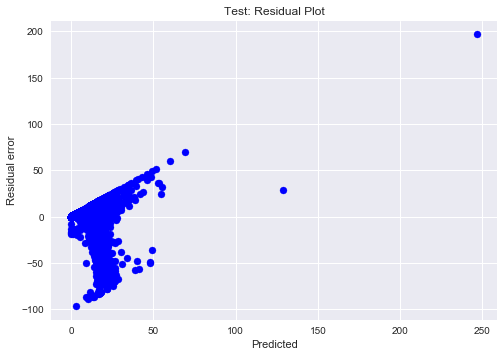

Test RMSE error:  4.17873991762


In [57]:
print("number of instances where negative values were predicted: ",lr_predictions[lr_predictions<0].shape[0])
lr_predictions[lr_predictions<0]=0.0
plot_res(lr_predictions,ytest)
lr_rmse=np.sqrt(mean_squared_error(lr_predictions,ytest))
print("Test RMSE error: ",lr_rmse)

KNN Regression

In [58]:
def apply_knn(Xtrain,ytrain,Xtest,neighbors):
    ytest_pred=[]
    ytrain_pred=[]
    for k in neighbors:
        knn=KNeighborsRegressor(algorithm='auto',n_neighbors=k)
        knn.fit(Xtrain,ytrain)
        ytest_pred.append(knn.predict(Xtest))
        ytrain_pred.append(knn.predict(Xtrain))
    return ytest_pred,ytrain_pred

In [59]:
neighbors=[1,3,5,7,10]
k_predictions,train_pred=apply_knn(Xtrain[:500000],ytrain[:500000],Xtest[:100000],neighbors)

In [60]:
k_rmse_test=[];k_rmse_train=[]
for kp1,kp2 in zip(k_predictions,train_pred):
    error1=np.sqrt(mean_squared_error(kp1,ytest[:100000]))
    error2=np.sqrt(mean_squared_error(kp2,ytrain[:500000]))
    k_rmse_test.append(error1)
    k_rmse_train.append(error2)

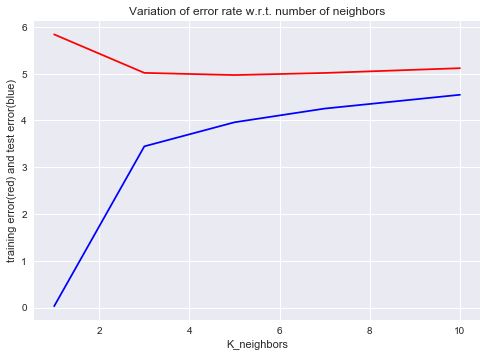

In [61]:
plt.plot(neighbors,k_rmse_test,'r')
plt.xlabel('K_neighbors')
plt.title('Variation of error rate w.r.t. number of neighbors')
plt.hold
plt.plot(neighbors,k_rmse_train,'b')
plt.xlabel('K_neighbors')
plt.ylabel('training error(red) and test error(blue)')
plt.title('Variation of error rate w.r.t. number of neighbors')
plt.show()

Choose the Optimal choice of k=5 and perform fit KNN regression on the data

In [62]:
def knn_w_k(Xtrain,ytrain,Xtest,neighbors=5):
    knn=KNeighborsRegressor(algorithm='auto',n_neighbors=neighbors)
    knn.fit(Xtrain,ytrain)
    print("R2 score on training set: ",knn.score(Xtrain,ytrain))
    ytest_pred=knn.predict(Xtest)
    return ytest_pred

In [63]:
ytest_pred=knn_w_k(Xtrain[:1000000],ytrain[:1000000],Xtest[:200000])
k_rmse=np.sqrt(mean_squared_error(ytest_pred,ytest[:200000]))

R2 score on training set:  0.815711649604


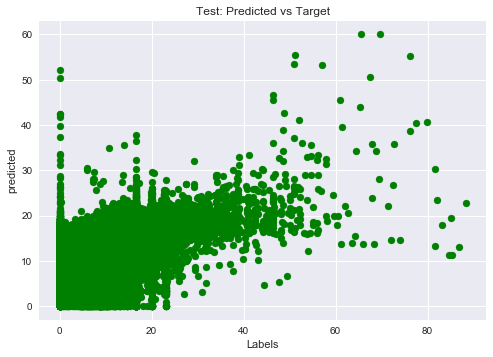

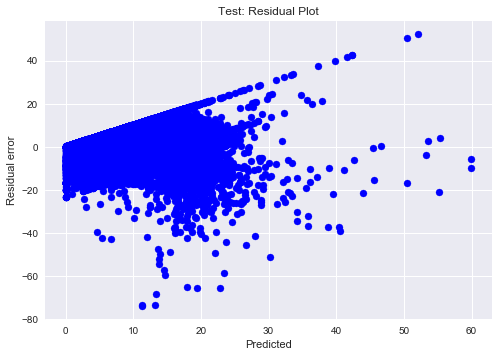

In [64]:
plot_res(ytest_pred,ytest[:200000])

Boosting techniques

In [65]:
import xgboost as xgb
dtrain = xgb.DMatrix(Xtrain, label=ytrain)
dtest = xgb.DMatrix(Xtest, label=ytest)
params_xgb = {'min_child_weight': 1, 
              'eta': 0.1, 
              'colsample_bytree': 0.9, 
            'max_depth': 6,
            'subsample': 0.9, 
              'lambda': 1., 
              'nthread': -1, 
              'booster' : 'gbtree', 
              'silent': False,
            'eval_metric': 'rmse', 
              'objective': 'reg:linear'}

In [66]:
def apply_xgb(Xtrain,ytrain,Xtest,params):
    dtrain = xgb.DMatrix(Xtrain, label=ytrain)
    dtest=xgb.DMatrix(Xtest,ytest)
    model = xgb.train(params, dtrain, 10, maximize=False, verbose_eval=1)
    xgb.plot_importance(model, max_num_features=11, height=0.7)
    plt.show()
    pred = model.predict(dtest)
    return pred

[09:31:58] Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[09:32:11] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[09:32:23] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[09:32:35] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[09:32:47] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[09:33:00] C:\Users\Administrator\Desktop\xgboost\src\tree\updater_prune.cc:74: tree pruning end, 1 roots, 126 extra nodes, 0 pruned nodes, max_depth=6
[09:33:12] C:\Users\Administrator\Desktop\xgboost\src\tree\updater

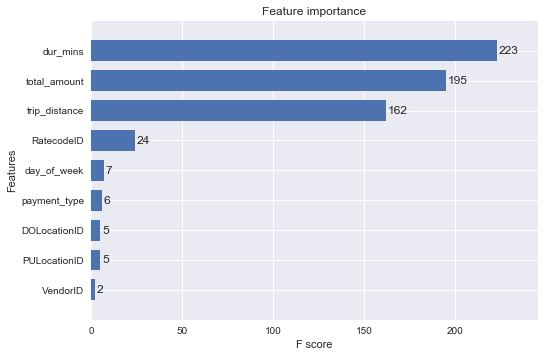

xgb RMSE:  3.38751


In [67]:
xgb_pred=apply_xgb(Xtrain,ytrain,Xtest,params_xgb)
xgb_rmse=np.sqrt(mean_squared_error(xgb_pred,ytest))
print("xgb RMSE: ",xgb_rmse)

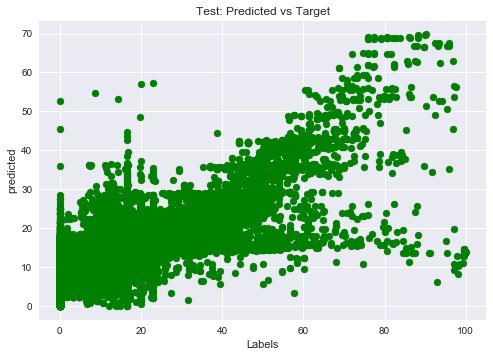

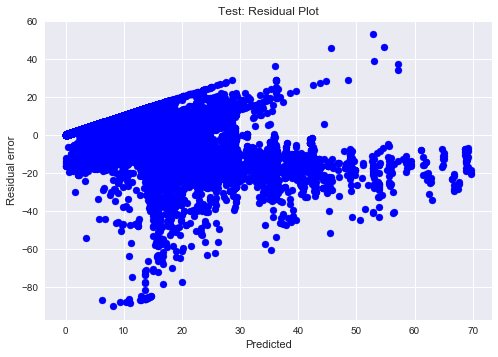

In [68]:
xgb_pred[xgb_pred<0]=0
plot_res(xgb_pred,ytest)

In [70]:
#Not many examples for higher tip %

df2[df2['percent_tips']>75].count()

VendorID           603
passenger_count    603
trip_distance      603
RatecodeID         603
PULocationID       603
DOLocationID       603
payment_type       603
total_amount       603
dur_mins           603
day_of_week        603
percent_tips       603
dtype: int64